In [ ]:
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
df.head(10)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5
5,X14.V1.56,55,28,18,16,16,19,25,40,52,66,81,98,111,122,105,85,66,51,34,19,16,8,-5,-21,-18,-14,3,27,46,57,60,51,35,22,20,28,28,35,43,...,-4,-17,-30,-45,-71,-81,-78,-69,-60,-45,-33,-25,-14,-2,3,-5,-18,-39,-61,-73,-77,-76,-79,-64,-40,-25,0,9,12,-6,-12,-31,-42,-54,-60,-64,-60,-56,-55,5
6,X3.V1.191,-55,-9,52,111,135,129,103,72,37,0,-38,-77,-113,-128,-121,-105,-71,-27,13,44,60,64,40,30,25,28,34,31,18,-19,-53,-76,-81,-74,-57,-36,-21,12,55,...,94,109,107,88,52,5,-24,-37,-50,-58,-66,-65,-60,-45,-20,1,23,50,74,99,125,141,129,95,41,-21,-77,-117,-135,-137,-125,-99,-79,-62,-41,-26,11,67,128,4
7,X11.V1.273,1,-2,-8,-11,-12,-17,-15,-16,-18,-17,-19,-18,-16,-15,-14,-21,-19,-24,-24,-24,-17,-20,-23,-15,-17,-20,-18,-19,-20,-19,-18,-20,-25,-27,-24,-22,-20,-9,0,...,-20,-26,-24,-25,-35,-41,-41,-53,-61,-58,-59,-55,-53,-65,-78,-87,-97,-100,-106,-104,-107,-110,-110,-109,-104,-118,-111,-102,-80,-67,-79,-91,-97,-88,-76,-72,-66,-57,-39,2
8,X19.V1.874,-278,-246,-215,-191,-177,-167,-157,-139,-118,-92,-63,-39,-11,14,36,60,70,78,79,69,27,-45,-123,-183,-218,-242,-256,-256,-236,-205,-165,-125,-84,-41,-10,12,35,58,71,...,74,79,81,76,65,63,62,65,67,70,63,45,20,-11,-32,-26,3,40,85,124,182,248,349,418,419,291,73,-152,-311,-386,-400,-379,-336,-281,-226,-174,-125,-79,-40,1
9,X3.V1.491,8,15,13,3,-6,-8,-5,4,25,41,48,44,34,16,-2,-11,-24,11,33,43,48,42,33,14,-1,-7,-17,-36,-59,-74,-88,-84,-64,-37,-8,24,47,49,42,...,39,29,12,-8,-10,-13,-12,-7,1,3,6,13,12,7,0,2,2,15,28,27,18,2,-5,-6,13,41,66,72,68,65,49,31,11,-5,-17,-19,-15,-15,-11,4


In [ ]:
print(df.info)

<bound method DataFrame.info of        Unnamed: 0   X1   X2   X3   X4   X5  ...  X174  X175  X176  X177  X178  y
0      X21.V1.791  135  190  229  223  192  ...  -103  -127  -116   -83   -51  4
1      X15.V1.924  386  382  356  331  320  ...   157   156   154   143   129  1
2         X8.V1.1  -32  -39  -47  -37  -32  ...   -12   -30   -35   -35   -36  5
3       X16.V1.60 -105 -101  -96  -92  -89  ...   -85   -77   -72   -69   -65  5
4       X20.V1.54   -9  -65  -98 -102  -78  ...   -41   -65   -83   -89   -73  5
...           ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ... ..
11495  X22.V1.114  -22  -22  -23  -26  -36  ...    -1   -18   -37   -47   -48  2
11496  X19.V1.354  -47  -11   28   77  141  ...    27    48    77   117   170  1
11497    X8.V1.28   14    6  -13  -16   10  ...   -67   -30    -2    -1    -8  5
11498  X10.V1.932  -40  -25   -9  -12   -2  ...   116    86    68    59    55  3
11499  X16.V1.210   29   41   57   72   74  ...     5     4    -2     2    20

# Preprocessing our data

Before we can start running models on our data, we need to clean it up a bit.

- First, let's get rid of the different indicators in our 'y' column. All we care about is whether the patient is seizing or not --> We want to turn this into a binary classification problem.

In [ ]:
df['output'] = df.y == 1
df['output'] = df['output'].astype(int)
df.pop('y')
df.drop(df.columns[0], axis=1, inplace=True)

In [ ]:
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,output
0,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [ ]:
collist = df.columns.tolist()[:178]
df = df[collist + ['output']]
df.info

<bound method DataFrame.info of         X1   X2   X3   X4   X5   X6  ...  X174  X175  X176  X177  X178  output
0      135  190  229  223  192  125  ...  -103  -127  -116   -83   -51       0
1      386  382  356  331  320  315  ...   157   156   154   143   129       1
2      -32  -39  -47  -37  -32  -36  ...   -12   -30   -35   -35   -36       0
3     -105 -101  -96  -92  -89  -95  ...   -85   -77   -72   -69   -65       0
4       -9  -65  -98 -102  -78  -48  ...   -41   -65   -83   -89   -73       0
...    ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...     ...
11495  -22  -22  -23  -26  -36  -42  ...    -1   -18   -37   -47   -48       0
11496  -47  -11   28   77  141  211  ...    27    48    77   117   170       1
11497   14    6  -13  -16   10   26  ...   -67   -30    -2    -1    -8       0
11498  -40  -25   -9  -12   -2   12  ...   116    86    68    59    55       0
11499   29   41   57   72   74   62  ...     5     4    -2     2    20       0

[11500 rows x 179 c

In [ ]:
df = df.sample(n=len(df))
df = df.reset_index(drop=True)
df.info

<bound method DataFrame.info of         X1   X2   X3   X4   X5   X6  ...  X174  X175  X176  X177  X178  output
0       40   47   54   56   57   52  ...    52    43    22   -10   -53       0
1     -108 -127 -140 -139 -115  -83  ...   103   125   158   153   142       0
2      -11  -43  -72  -78  -45    3  ...   -54   -43   -24   -15   -14       0
3      -26  -38  -46  -37  -26  -31  ...   -18     3     0   -11   -11       0
4       17   12   13   12   16   21  ...   -60   -65   -66   -68   -66       0
...    ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...     ...
11495  -14  -17  -23  -16  -13   -8  ...   -93   -91   -85   -77   -60       0
11496 -139 -159 -167 -169 -175 -166  ...   -34   -49   -75   -71   -79       0
11497   34   31   29   19   16   12  ...   -12    -7   -12    -9   -12       0
11498   -2  -11  -21  -31  -36  -37  ...    -7   -11   -14   -17   -21       0
11499  -27  -39  -43  -56  -64  -76  ...   -19    -9     1    11    24       0

[11500 rows x 179 c

Now, we'll want to split our data into a training, testing, and validation set, using a 70/15/15 way split.

In [ ]:
validation_and_testing = df.sample(frac=0.3)
testing = validation_and_testing.sample(frac=0.5)
validation = validation_and_testing.drop(testing.index)
all_training = df.drop(validation_and_testing.index)

In [ ]:
# Returns the frequency of positive labels
def freq(y):
    return sum(y) / len(y)

print('Testing dataset length: ', len(testing), ' frequency of positive samples: ', freq(testing['output'].values))
print('Validation dataset length: ', len(validation), ' frequency of positive samples: ', freq(validation['output'].values))
print('Training dataset length: ', len(all_training), ' frequency of positive samples: ', freq(all_training['output'].values))


Testing dataset length:  1725  frequency of positive samples:  0.20753623188405798
Validation dataset length:  1725  frequency of positive samples:  0.18840579710144928
Training dataset length:  8050  frequency of positive samples:  0.2008695652173913


It's clear that we have a minority of seizure examples in our dataset (people *usually* aren't seizing). However, that means that our model could learn to blindly classify everything as belonging to the majority class - non-seizure in this case. To fix that problem, we can down-sample the number of cases we have of non-seizure activity so they are more evenly balanced.

In [ ]:
positive_class = all_training.output == 1
positive = all_training.loc[positive_class]
negative = all_training.loc[~positive_class]

# Merge balanced data
n = np.min([len(positive), len(negative)])
df_train = pd.concat([positive.sample(n=n), negative.sample(n=n)], axis=0, ignore_index=True)

# Shuffle it up
df_train = df_train.sample(n=len(df_train), random_state=42).reset_index(drop=True)
print('Training dataset length: ', len(df_train), ' frequency of positive samples: ', freq(df_train['output'].values))

Training dataset length:  3234  frequency of positive samples:  0.5


In [ ]:
x_cols = df.columns.tolist()[:178]
X_train = df_train[x_cols].values
all_X_train = all_training[x_cols].values
X_valid = validation[x_cols].values

y_train = df_train['output'].values
y_valid = validation['output'].values

print('Training All shapes:', all_X_train.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)


Training All shapes: (8050, 178)
Training shapes: (3234, 178) (3234,)
Validation shapes: (1725, 178) (1725,)


## Before we start running our data through different models, we should also take care to scale it correctly.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(all_X_train)
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

# Model Evaluation

Because we'll be evaluating a few different models, let's set up our evaluation framework early on.

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix

def specificity_score(y_pred, y_test, thresh=0.5):
    '''
    Returns probability of incorrectly classified negative samples (false positives)
    '''
    return sum((y_pred < thresh) & (y_test == 0)) / sum(y_test == 0)

def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    
    # Begin CHANGES
    fst_empty_cell = (columnwidth-3)//2 * " " + "t/p" + (columnwidth-3)//2 * " "
    
    if len(fst_empty_cell) < len(empty_cell):
        fst_empty_cell = " " * (len(empty_cell) - len(fst_empty_cell)) + fst_empty_cell
    # Print header
    print("    " + fst_empty_cell, end=" ")
    # End CHANGES
    
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
        
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()
        
def evaluate(y_pred, y_actual, error_threshold=0.5, model_name=''):
    '''
    Param: y_pred: Predicted values from model
    Param: y_actual: Actual results
    Param: error_threshold: Our threshold for determining Type I vs. Type II error
    Output: Printed summary of model performance
    '''
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > error_threshold))
    recall = recall_score(y_actual, (y_pred > error_threshold))
    precision = precision_score(y_actual, (y_pred > error_threshold))
    specificity = specificity_score(y_pred, y_actual)
    
    print('************* Evaluating Model ****************')
    if model_name:
        print('Model: {}'.format(model_name))
    print('AUC: %.3f' % auc)
    print('Accuracy: %.3f'% accuracy)
    print('Recall: %.3f'% recall)
    print('Precision: %.3f'% precision)
    print('Specificity: %.3f'% specificity)
    
    cm = confusion_matrix(y_actual, (y_pred > error_threshold))
    print('Confusion Matrix:')
    print_cm(cm, ['Ictal', 'Interictal'])
    print('\n\n')
    

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Modelling Seizure Activity

## Method \#1: Logistic Regression

Logistic Regression is at the heart of neural networks. It's ideal for two class discrimination problems, where continuous variables map to discrete outputs.

In [ ]:
from sklearn.linear_model import LogisticRegression

log_rg = LogisticRegression(random_state=42).fit(X_train_tf, y_train)
y_train_pred = log_rg.predict_proba(X_train_tf)[:,1]
y_valid_pred = log_rg.predict_proba(X_valid_tf)[:,1]

evaluate(y_train_pred, y_train, error_threshold=0.45, model_name='Logistic Regression Test Set')
evaluate(y_valid_pred, y_valid, error_threshold=0.45, model_name='Logistic Regression Validation Set')

************* Evaluating Model ****************
Model: Logistic Regression Test Set
AUC: 0.618
Accuracy: 0.465
Recall: 0.698
Precision: 0.476
Specificity: 0.779
Confusion Matrix:
        t/p         Ictal Interictal 
         Ictal      377.0     1240.0 
    Interictal      489.0     1128.0 



************* Evaluating Model ****************
Model: Logistic Regression Validation Set
AUC: 0.533
Accuracy: 0.292
Recall: 0.649
Precision: 0.160
Specificity: 0.744
Confusion Matrix:
        t/p         Ictal Interictal 
         Ictal      293.0     1107.0 
    Interictal      114.0      211.0 





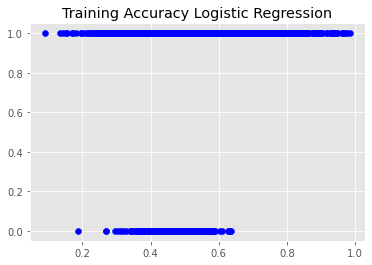

In [ ]:
plt.scatter(x=y_train_pred,y=y_train,color="blue")
plt.title('Training Accuracy Logistic Regression')
plt.show()

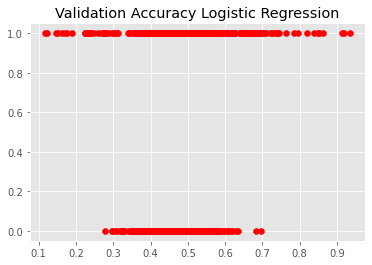

In [ ]:
plt.scatter(x=y_valid_pred,y=y_valid,color="red")
plt.title('Validation Accuracy Logistic Regression')
plt.show()

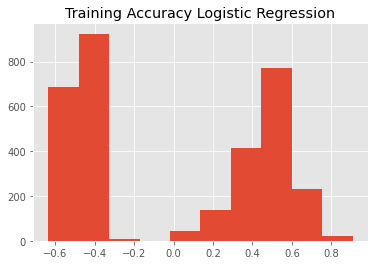

In [ ]:
plt.hist(y_train - y_train_pred)
plt.title('Training Accuracy Logistic Regression')
plt.show()

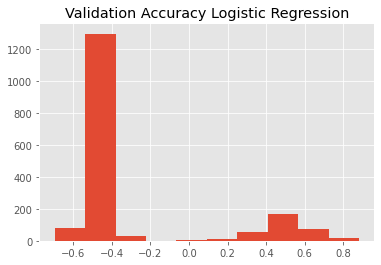

In [ ]:
plt.hist(y_valid - y_valid_pred)
plt.title('Validation Accuracy Logistic Regression')
plt.show()

## Method 2: KNN
K-Nearest Neighbors is a classic clustering algorithm, that could deal well with the non-linearities found in seizure data. Let's see if it can perform better than simple linear regression

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train_tf, y_train)

y_train_pred = knn.predict_proba(X_train_tf)[:,1]
y_valid_pred = knn.predict_proba(X_valid_tf)[:,1]

evaluate(y_train_pred, y_train, error_threshold=0.45, model_name='KNN Test Set')
evaluate(y_valid_pred, y_valid, error_threshold=0.45, model_name='KNN Validation Set')

************* Evaluating Model ****************
Model: KNN Test Set
AUC: 0.994
Accuracy: 0.658
Recall: 0.317
Precision: 1.000
Specificity: 1.000
Confusion Matrix:
        t/p         Ictal Interictal 
         Ictal     1617.0        0.0 
    Interictal     1105.0      512.0 



************* Evaluating Model ****************
Model: KNN Validation Set
AUC: 0.970
Accuracy: 0.861
Recall: 0.271
Precision: 0.967
Specificity: 0.999
Confusion Matrix:
        t/p         Ictal Interictal 
         Ictal     1397.0        3.0 
    Interictal      237.0       88.0 





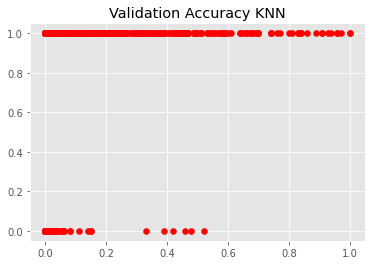

In [ ]:
plt.scatter(x=y_valid_pred,y=y_valid,color="red")
plt.title('Validation Accuracy KNN')
plt.show()

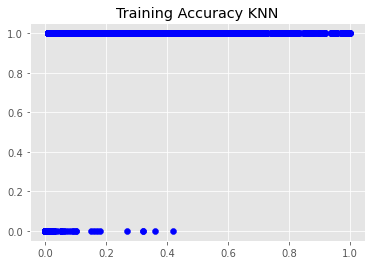

In [ ]:
plt.scatter(x=y_train_pred,y=y_train,color="blue")
plt.title('Training Accuracy KNN')
plt.show()

## Model 3: Multi-layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(10, 5), random_state=1)
mlp.fit(X_train_tf, y_train)

y_train_pred = mlp.predict_proba(X_train_tf)[:,1]
y_valid_pred = mlp.predict_proba(X_valid_tf)[:,1]

evaluate(y_train_pred, y_train, error_threshold=0.45, model_name='MLP Test Set')
evaluate(y_valid_pred, y_valid, error_threshold=0.45, model_name='MLP Validation Set')

************* Evaluating Model ****************
Model: MLP Test Set
AUC: 1.000
Accuracy: 1.000
Recall: 1.000
Precision: 1.000
Specificity: 1.000
Confusion Matrix:
        t/p         Ictal Interictal 
         Ictal     1617.0        0.0 
    Interictal        0.0     1617.0 



************* Evaluating Model ****************
Model: MLP Validation Set
AUC: 0.977
Accuracy: 0.956
Recall: 0.923
Precision: 0.855
Specificity: 0.964
Confusion Matrix:
        t/p         Ictal Interictal 
         Ictal     1349.0       51.0 
    Interictal       25.0      300.0 





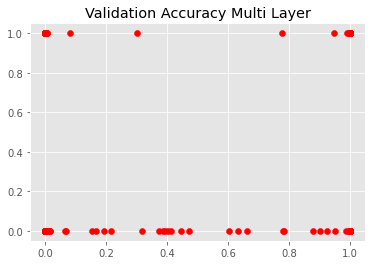

In [ ]:
plt.scatter(x=y_valid_pred,y=y_valid,color="red")
plt.title('Validation Accuracy Multi Layer')
plt.show()

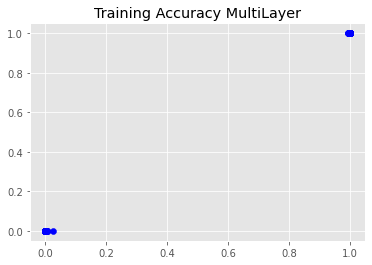

In [ ]:
plt.scatter(x=y_train_pred,y=y_train,color="blue")
plt.title('Training Accuracy MultiLayer')
plt.show()

## Model 4: Support Vector Machine

In [ ]:
from sklearn import svm

clf = svm.SVC(gamma='auto', probability=True)
clf.fit(X_train_tf, y_train)

y_train_pred = clf.predict_proba(X_train_tf)[:,1]
y_valid_pred = clf.predict_proba(X_valid_tf)[:,1]

evaluate(y_train_pred, y_train, error_threshold=0.45, model_name='SVM Test Set')
evaluate(y_valid_pred, y_valid, error_threshold=0.45, model_name='SVM Validation Set')

************* Evaluating Model ****************
Model: SVM Test Set
AUC: 0.996
Accuracy: 0.976
Recall: 0.976
Precision: 0.976
Specificity: 0.978
Confusion Matrix:
        t/p         Ictal Interictal 
         Ictal     1597.0       40.0 
    Interictal       39.0     1598.0 



************* Evaluating Model ****************
Model: SVM Validation Set
AUC: 0.993
Accuracy: 0.966
Recall: 0.947
Precision: 0.888
Specificity: 0.972
Confusion Matrix:
        t/p         Ictal Interictal 
         Ictal     1342.0       41.0 
    Interictal       18.0      324.0 





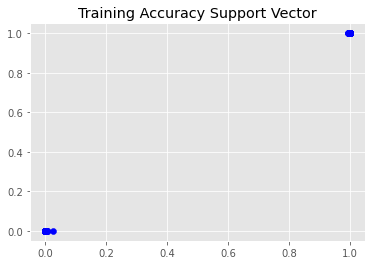

In [ ]:
plt.scatter(x=y_train_pred,y=y_train,color="blue")
plt.title('Training Accuracy Support Vector')
plt.show()

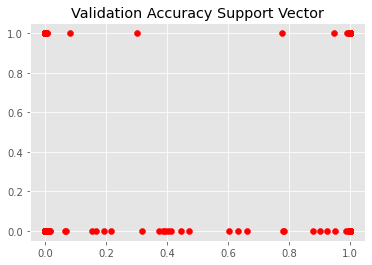

In [ ]:
plt.scatter(x=y_valid_pred,y=y_valid,color="red")
plt.title('Validation Accuracy Support Vector')
plt.show()